# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904425455
verification code:  188f0222a536
⚠️  Include those two lines at the top of your notebook submission!
======================================================================


## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2580 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-10 06:01:00,Downtown,113,1.0,4.12,Credit,True
1,1001,2025-11-10 06:15:00,Suburb,107,1.0,2.01,Cash,True
2,1002,2025-11-10 06:46:00,Downtown,101,1.0,3.24,Cash,False
3,1003,2025-11-10 06:53:00,Campus,105,2.0,6.55,Credit,False
4,1004,2025-11-10 07:08:00,Campus,104,1.0,2.25,Mobile,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
#Checking if column timestamp is datetiom64 type
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  2580 non-null   int64         
 1   timestamp       2580 non-null   datetime64[ns]
 2   location        2580 non-null   object        
 3   product_id      2580 non-null   int64         
 4   quantity        2577 non-null   float64       
 5   revenue         2577 non-null   float64       
 6   payment_method  2580 non-null   object        
 7   loyalty_member  2580 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 143.7+ KB


In [4]:
# Task 1: use isna(), nunique(), min/max on timestamp

#1. How many missing values are in each column?
print("\nMissing values by column:")
print(sales.isna().sum())

#2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
count_prod_insales = sales['product_id'].nunique()
print(f"\nThere are {count_prod_insales} product IDs in sales data but there are only {len(products)} items in catalog.")

#3. What is the date range (earliest and latest transaction)?
earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()
print(f"\nThe earliest transaction was on {earliest} and the latest on {latest}.")


Missing values by column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          3
revenue           3
payment_method    0
loyalty_member    0
dtype: int64

There are 21 product IDs in sales data but there are only 18 items in catalog.

The earliest transaction was on 2025-11-10 06:01:00 and the latest on 2025-11-23 21:05:00.


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [5]:
# Task 2: use pd.merge() with appropriate join type
sales_wprodinfo = pd.merge(sales, products, on='product_id', how='right')
sales_wprodinfo

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1002,2025-11-10 06:46:00,Downtown,101,1.0,3.24,Cash,False,Espresso,Coffee,1.2
1,1006,2025-11-10 07:21:00,Campus,101,1.0,2.66,Mobile,True,Espresso,Coffee,1.2
2,1016,2025-11-10 07:45:00,Suburb,101,1.0,3.28,Mobile,True,Espresso,Coffee,1.2
3,1024,2025-11-10 08:12:00,Downtown,101,1.0,3.14,Credit,False,Espresso,Coffee,1.2
4,1042,2025-11-10 08:44:00,Campus,101,1.0,2.87,Credit,False,Espresso,Coffee,1.2
...,...,...,...,...,...,...,...,...,...,...,...
2564,3262,2025-11-21 12:30:00,Downtown,118,1.0,24.15,Credit,False,Steak Panini,Sandwich,5.5
2565,3298,2025-11-21 13:25:00,Suburb,118,1.0,17.45,Credit,False,Steak Panini,Sandwich,5.5
2566,3336,2025-11-21 17:17:00,Suburb,118,1.0,19.06,Mobile,False,Steak Panini,Sandwich,5.5
2567,3546,2025-11-23 13:05:00,Suburb,118,1.0,20.69,Credit,True,Steak Panini,Sandwich,5.5


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [6]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

#1. Compare the shape of the merged DataFrame to the original sales data
print("The shape of original sales Dataframe is:", sales.shape)
print("The shape of merged sales Dataframe is:", sales_wprodinfo.shape)

#2. Check if any rows have missing values in the product columns (name, category, cost)
print("\nMissing values by column in the merged Dataframe:")
print(sales_wprodinfo.isna().sum())

print("\nMissing values by column in the product Dataframe:")
print(products.isna().sum())

#3. If there are missing values, identify which product_id(s) are causing the problem
missing_values = sales.loc[(~sales['product_id'].isin(products['product_id'])), 'product_id']
print(f"\n{len(missing_values)} product_id(s) in the original sales Dataframe weren't listed in the products Dataframe")
print("\nAnd They are:")
print(missing_values)


The shape of original sales Dataframe is: (2580, 8)
The shape of merged sales Dataframe is: (2569, 11)

Missing values by column in the merged Dataframe:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          3
revenue           3
payment_method    0
loyalty_member    0
name              0
category          0
cost              0
dtype: int64

Missing values by column in the product Dataframe:
product_id    0
name          0
category      0
cost          0
dtype: int64

11 product_id(s) in the original sales Dataframe weren't listed in the products Dataframe

And They are:
444     201
701     200
915     200
1088    199
1311    201
1636    200
1845    201
1883    199
1910    200
2327    201
2341    201
Name: product_id, dtype: int64


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [7]:
# Task 4: create profit column, then groupby with .agg()
sales_wprodinfo['profit'] =  sales_wprodinfo['revenue'] - (sales_wprodinfo['cost']*sales_wprodinfo['quantity'])

profby_cat = (
    sales_wprodinfo
    .groupby("category")
    .agg(
        total_profit = ("profit", "sum"),
        number_of_transactions = ("transaction_id", "count")
    )
    .sort_values("total_profit", ascending=False)
)

profby_cat

,total_profit,number_of_transactions
category,,
Sandwich,4179.35,595
Coffee,2322.99,945
Pastry,1479.80,501
Tea,779.27,528


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [8]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

profby_cat_loc = (
    sales_wprodinfo
    .groupby(["location", "category"])
    .agg(
        total_profit = ("profit", "sum"),
        ave_profit_per_transaction = ("profit", "mean"),
        number_of_transactions = ("transaction_id", "count")
    )
    .sort_values("total_profit", ascending=False)
    .reset_index() 
)
profby_cat_loc


,location,category,total_profit,ave_profit_per_transaction,number_of_transactions
0,Downtown,Sandwich,2399.37,7.815537,308
1,Campus,Coffee,1128.11,2.081384,542
2,Suburb,Sandwich,1043.90,6.778571,154
3,Downtown,Coffee,991.80,3.109091,320
4,Campus,Sandwich,736.08,5.534436,133
5,Downtown,Pastry,596.60,3.615758,165
6,Campus,Pastry,552.46,2.488559,222
7,Suburb,Tea,346.77,1.421189,245
8,Suburb,Pastry,330.74,2.926903,114
9,Downtown,Tea,271.98,1.999853,137


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

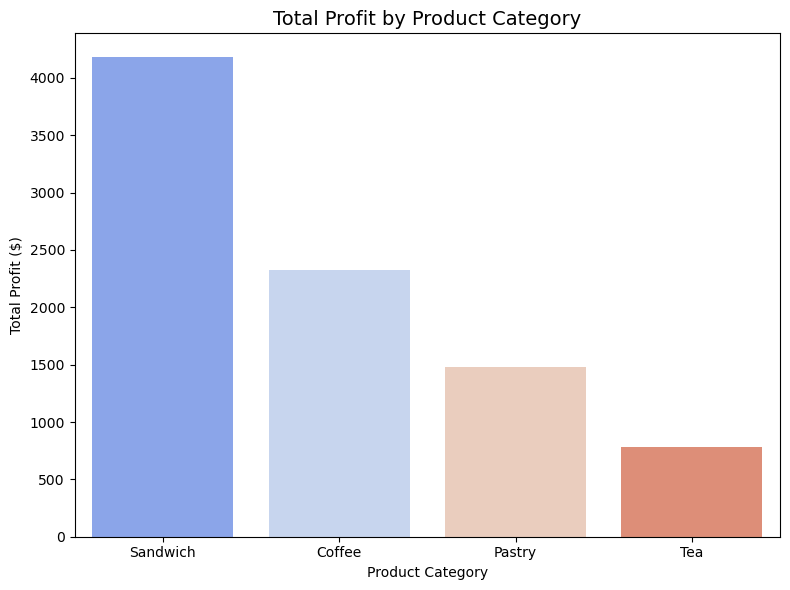

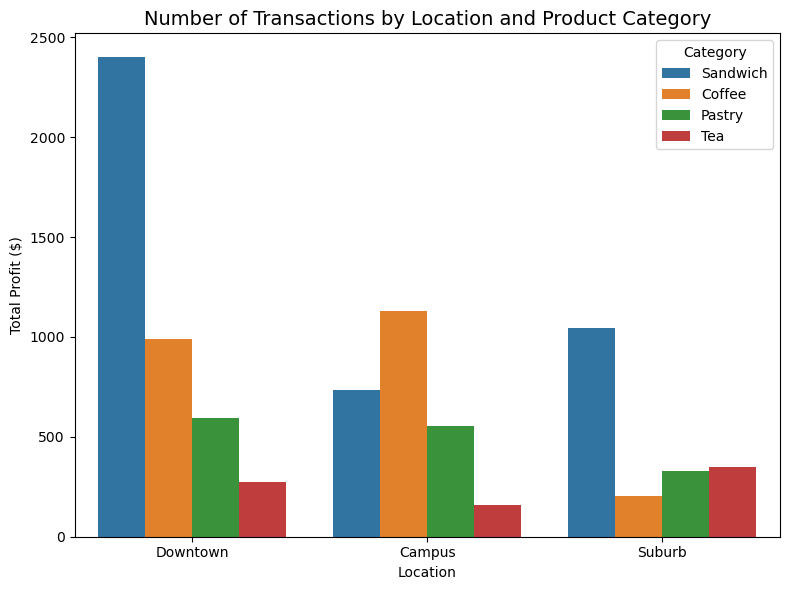

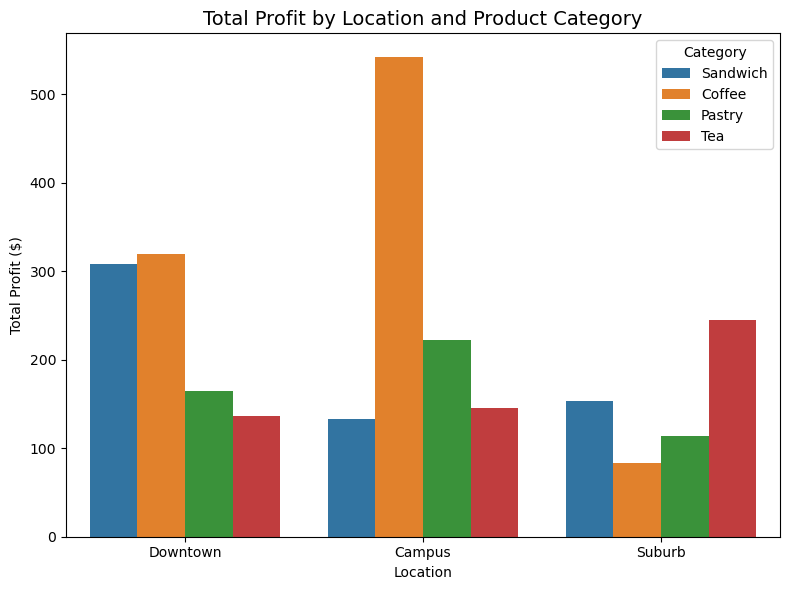

In [9]:
# Task 6: use sns.barplot() with aggregated data
plt.figure(figsize=(8, 6))
sns.barplot(
    data=profby_cat,
    x='category',
    y='total_profit',
    hue='category',
    palette='coolwarm'
)
plt.title("Total Profit by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Profit ($)")
plt.tight_layout()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=profby_cat_loc,
    x='location',
    y='total_profit',
    hue='category',
    palette='tab10'
)
plt.title("Number of Transactions by Location and Product Category", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Total Profit ($)")
plt.legend(title="Category")
plt.tight_layout()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=profby_cat_loc,
    x='location',
    y='number_of_transactions',
    hue='category',
    palette='tab10'
)
plt.title("Total Profit by Location and Product Category", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Total Profit ($)")
plt.legend(title="Category")
plt.tight_layout()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*1. If I had not verified the merge, I would not have noticed that 11 products were missing from the catalog, which caused those rows to be dropped. Identifying this issue is important because it allows the owner to register the missing products before analysis, ensuring complete and accurate profitability results.*

*2. Aggregating only by category shows overall top-performing items, while adding location reveals that each store has its own pattern. For example, sandwiches are the most profitable overall, but on the campus location coffee becomes the top category.*

*3. Profitability varies significantly by location; sandwiches drive the highest overall profit; coffee dominates on campus; and some locations generate many transactions but lower average profit per transaction, suggesting opportunities to increase per-sale value.*

*4. Offer combo deals pairing sandwiches with coffee or tea. Sandwiches are the highest-profit category overall, and coffee is the strongest performer on campus; bundling them can increase both total revenue and the average profit per transaction. Additional analysis: compare average profit per transaction for loyalty vs. non-loyalty customers; and examine whether payment method correlates with higher spending.*


## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

Question for extra investigation: Do sales patterns differ between weekdays and weekends?
   category  is_weekend  total_profit  ave_profit_per_transaction  \
0  Sandwich       False       3493.97                    7.174476   
1    Coffee       False       2088.63                    2.468830   
2    Pastry       False       1254.14                    2.950918   
3  Sandwich        True        685.38                    6.405421   
4       Tea       False        581.49                    1.491000   
5    Coffee        True        234.36                    2.391429   
6    Pastry        True        225.66                    3.008800   
7       Tea        True        197.78                    1.465037   

   number_of_transactions  
0                     488  
1                     847  
2                     426  
3                     107  
4                     392  
5                      98  
6                      75  
7                     136  


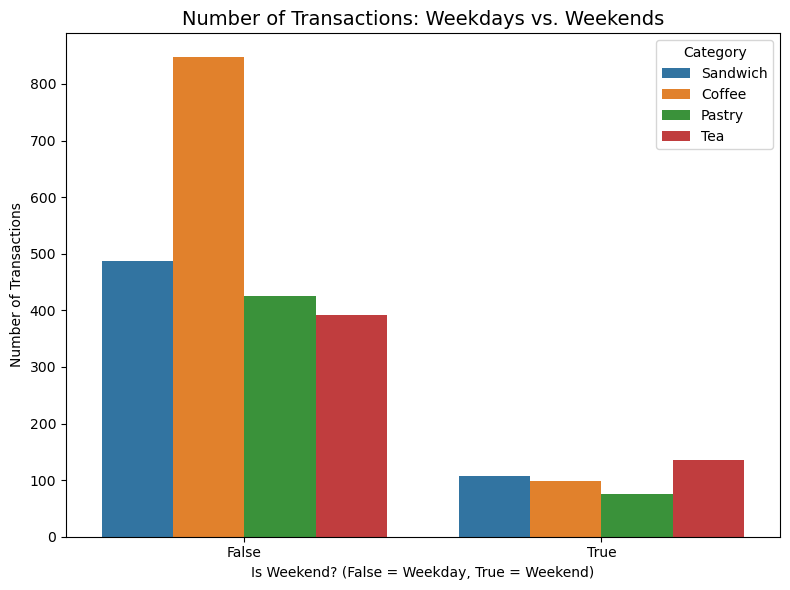

In [10]:
# Bonus: Your time-based analysis here

print("Question for extra investigation: Do sales patterns differ between weekdays and weekends?")
sales_wprodinfo['is_weekend'] = sales_wprodinfo['timestamp'].dt.dayofweek >= 5

profby_cat_week = (
    sales_wprodinfo
    .groupby(["category","is_weekend"])
    .agg(
        total_profit = ("profit", "sum"),
        ave_profit_per_transaction = ("profit", "mean"),
        number_of_transactions = ("transaction_id", "count")
    )
    .sort_values("total_profit", ascending=False)
    .reset_index() 
)
print(profby_cat_week)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=profby_cat_week,
    x='is_weekend',
    y='number_of_transactions',
    hue='category',
    palette='tab10'
)
plt.title("Number of Transactions: Weekdays vs. Weekends", fontsize=14)
plt.xlabel("Is Weekend? (False = Weekday, True = Weekend)")
plt.ylabel("Number of Transactions")
plt.legend(title="Category")
plt.tight_layout()

### Your Findings

*Question: Do sales patterns differ between weekdays and weekends? Based on the results, weekday sales are significantly higher across all categories, especially for coffee, which shows the largest drop on weekends. Sandwiches and tea retain slightly more weekend activity than pastries and coffee, but overall the shop generates most of its traffic and revenue from Monday to Friday.*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.